In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def plot_bgr(img, title=""):
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    f, axs = plt.subplots(1,1,figsize=(20,9))
    axs.imshow(img_rgb)
    axs.set_title(title, fontsize=20)

## load bullet pattern

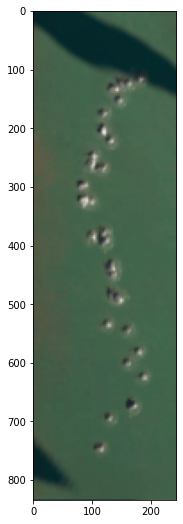

In [3]:
img = cv2.imread("bullet_pattern.png")
plot_bgr(img)

## color thresholding

In [4]:
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

low = (0,0,100)
high = (35, 50,255)
low2 = (0,0,0)
high2 = (100, 35,255)

mask = cv2.inRange(img_hsv, low, high)
mask2 = cv2.inRange(img_hsv, low2, high2)

Text(0.5, 1.0, 'mask2')

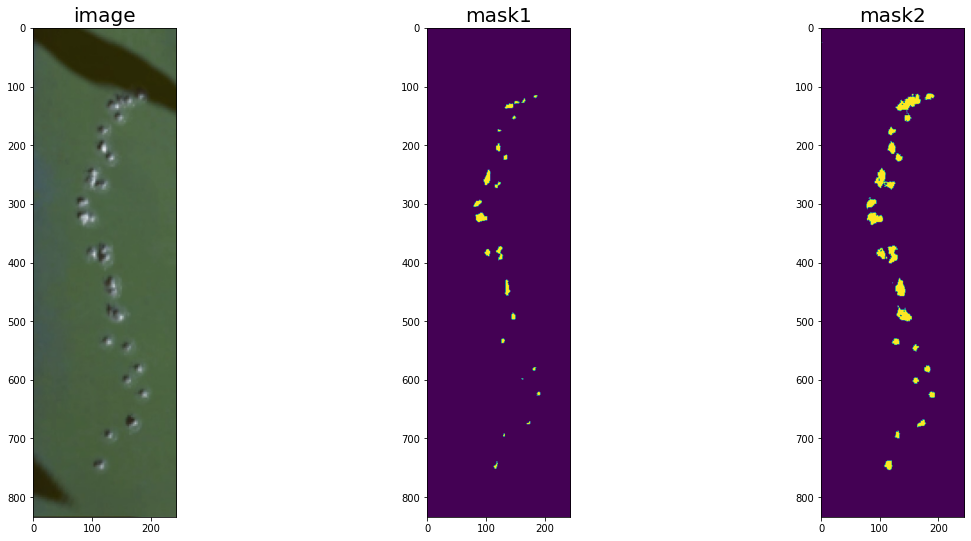

In [5]:
f, axs = plt.subplots(1,3,figsize=(20,9))
axs[0].imshow(img)
axs[0].set_title("image", fontsize=20)
axs[1].imshow(mask)
axs[1].set_title("mask1", fontsize=20)
axs[2].imshow(mask2)
axs[2].set_title("mask2", fontsize=20)

In [6]:
connectivity = 4  
output = cv2.connectedComponentsWithStats(mask2, connectivity, cv2.CV_32S)

num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

In [7]:
print(f"number of bullet predictions {num_labels}: \n")
print(f"left | top | width | height | area \n")
print(stats)

number of bullet predictions 29: 

left | top | width | height | area 

[[     0      0    244    834 199130]
 [     0     26      2      1      2]
 [   176    113     16     11    123]
 [   154    114      3      3      8]
 [   126    114     43     29    605]
 [   145    142      1      2      2]
 [   145    146      2      1      2]
 [   141    147     12     14    101]
 [   114    170     13     14    112]
 [   113    194     14     22    193]
 [   126    215     13     14    116]
 [    91    240     35     37    517]
 [    81    290      3      2      5]
 [    77    293     17     17    184]
 [    78    315     27     22    371]
 [   113    372     17     31    325]
 [    94    376     15     19    184]
 [   110    391      2      4      7]
 [   126    427     17     31    352]
 [   121    435      1      1      1]
 [   128    474     26     27    371]
 [   120    530     13     11    106]
 [   155    540     11     12     76]
 [   175    576     11     12     95]
 [   155    596 

In [8]:
centroids_nosize = np.zeros_like(mask2, dtype=np.uint8)
centroids_size = np.zeros_like(mask2, dtype=np.uint8)


Text(0.5, 1.0, 'size filtered centroids')

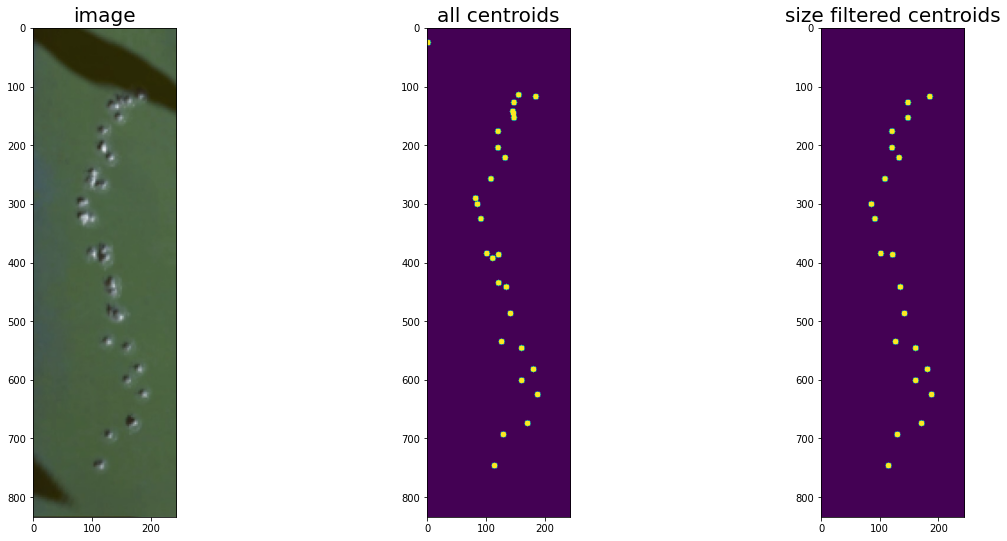

In [9]:
MIN_SIZE = 20
filtered_x = []
filtered_y = []
for stat in stats[1:]:
    x = stat[0] + stat[2]//2
    y = stat[1] + stat[3]//2
    cv2.circle(centroids_nosize, (x,y), radius=0, color=255, thickness=10)
    
    if stat[4] > MIN_SIZE:
        filtered_x.append(x)
        filtered_y.append(y)
        cv2.circle(centroids_size, (x,y), radius=0, color=255, thickness=10)
        

f, axs = plt.subplots(1,3,figsize=(20,9))
axs[0].imshow(img)
axs[0].set_title("image", fontsize=20)
axs[1].imshow(centroids_nosize)
axs[1].set_title("all centroids", fontsize=20)
axs[2].imshow(centroids_size)
axs[2].set_title("size filtered centroids", fontsize=20)

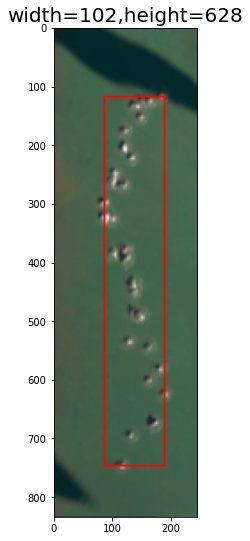

In [10]:
xmin, ymin, xmax, ymax = min(filtered_x), min(filtered_y), max(filtered_x), max(filtered_y)
width, height = xmax-xmin, ymax-ymin
image = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0,255), thickness=2)
title = f"{width=},{height=}"
plot_bgr(image,title=title)

## clean up using area?

## erosion to unconnect bullets?

## fit curve?